# Tech Challenge - Video Analysis

This notebook will guide you through the solution for the Tech Challenge. We will perform the following steps:
1. **Setup**: Install the necessary libraries for video processing and analysis.
2. **Video Analysis**: We will process the video to perform:
    - Facial Recognition
    - Emotion Recognition
    - Activity Detection (Motion Detection)
3. **Report Generation**: We will generate a summary of the analysis.

## 1. Setup

First, let's install the required libraries. We will use `opencv-python` for video processing, `fer` for emotion recognition, `tensorflow` as a backend for `fer`, and `matplotlib` for displaying the results.

In [ ]:
%pip install opencv-python fer tensorflow matplotlib

## 2. Video Analysis

Now, we will process the video file `Unlocking Facial Recognition_ Diverse Activities Analysis.mp4`.

In [ ]:
import cv2
from fer.fer import FER
import matplotlib.pyplot as plt

video_path = 'Unlocking Facial Recognition_ Diverse Activities Analysis.mp4'
cap = cv2.VideoCapture(video_path)

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
emotion_detector = FER(mtcnn=True)

total_frames = 0
detected_faces = []
detected_emotions = []
motion_events = []

prev_frame = None

while(cap.isOpened()):
    ret, frame = cap.read()
    if not ret:
        break

    total_frames += 1
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)
    detected_faces.append(len(faces))
    
    result = emotion_detector.detect_emotions(frame)
    if result:
        for face in result:
            (x, y, w, h) = face['box']
            dominant_emotion = max(face['emotions'], key=face['emotions'].get)
            detected_emotions.append(dominant_emotion)
            cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
            cv2.putText(frame, dominant_emotion, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
            
    if prev_frame is not None:
        frame_delta = cv2.absdiff(prev_frame, gray)
        thresh = cv2.threshold(frame_delta, 25, 255, cv2.THRESH_BINARY)[1]
        motion_events.append(cv2.countNonZero(thresh))
        
    prev_frame = gray
    
    cv2.imshow('Video', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

print(f'Total frames analyzed: {total_frames}')

/Users/joaopedrocm/Documents/FIAP/FASE-4/Tech-Challenge/.venv/lib/python3.12/site-packages/fer/fer.py:37: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
Matplotlib is building the font cache; this may take a moment.
/Users/joaopedrocm/Documents/FIAP/FASE-4/Tech-Challenge/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/joaopedrocm/Documents/FIAP/FASE-4/Tech-Challenge/.venv/lib/python3.12/site-packages/tensorflow/lite/python/interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpre

Total frames analyzed: 3326


## 3. Report Generation

Now, let's generate a report based on the analysis.

In [ ]:
import pandas as pd

report = {}
report['total_frames'] = total_frames

report['total_faces_detected'] = sum(detected_faces)
report['avg_faces_per_frame'] = sum(detected_faces) / total_frames if total_frames > 0 else 0

if detected_emotions:
    emotion_counts = pd.Series(detected_emotions).value_counts()
    report['dominant_emotion'] = emotion_counts.index[0]
    report['emotion_distribution'] = emotion_counts.to_dict()
else:
    report['dominant_emotion'] = 'N/A'
    report['emotion_distribution'] = {}

motion_threshold = 10000
anomalies = sum(1 for m in motion_events if m > motion_threshold)
report['significant_motion_events'] = anomalies
report['anomalies_detected'] = anomalies

print('--- Video Analysis Report ---')
print(f'Total Frames Analyzed: {report['total_frames']}')
print(f'Total Faces Detected: {report['total_faces_detected']}')
print(f'Average Faces per Frame: {report['avg_faces_per_frame']:.2f}')
print('--- Emotion Analysis ---')
print(f'Dominant Emotion: {report['dominant_emotion']}')
print('Emotion Distribution:')
if report['emotion_distribution']:
    for emotion, count in report['emotion_distribution'].items():
        print(f'  - {emotion}: {count}')
else:
    print('  No emotions detected.')
print('--- Activity Analysis ---')
print(f'Significant Motion Events: {report['significant_motion_events']}')
print(f'Anomalies Detected: {report['anomalies_detected']}')

--- Video Analysis Report ---
Total Frames Analyzed: 3326
Total Faces Detected: 2667
Average Faces per Frame: 0.80
--- Emotion Analysis ---
Dominant Emotion: happy
Emotion Distribution:
  - happy: 577
  - neutral: 440
  - sad: 271
  - surprise: 190
  - angry: 150
  - fear: 73
  - disgust: 8
--- Activity Analysis ---
Significant Motion Events: 1856
Anomalies Detected: 1856


### Visualization

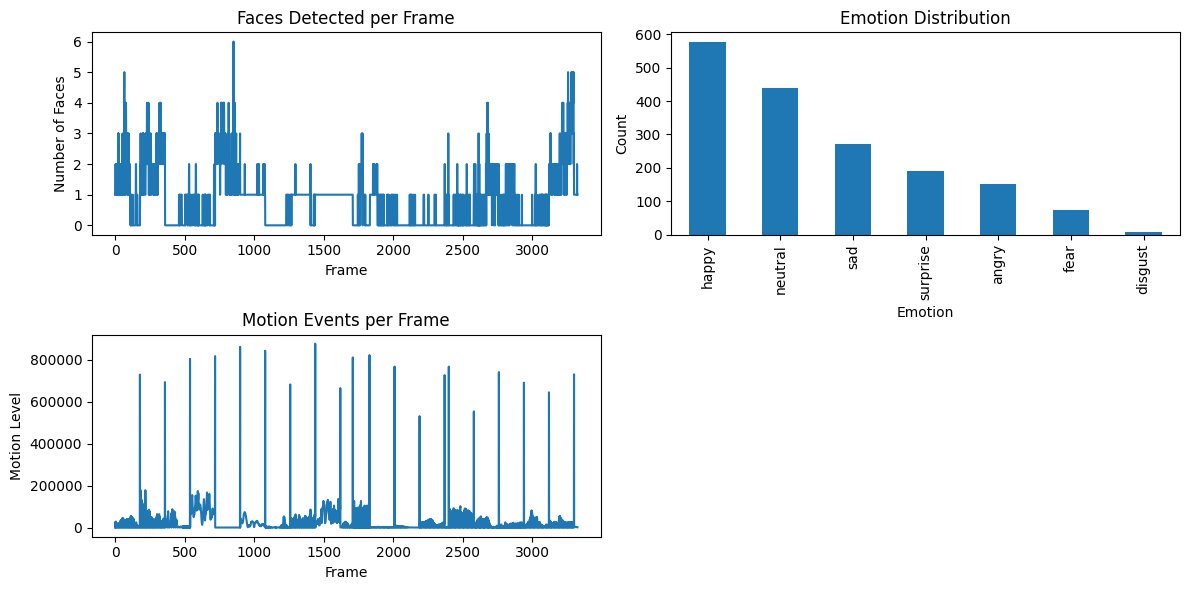

In [4]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.plot(detected_faces)
plt.title('Faces Detected per Frame')
plt.xlabel('Frame')
plt.ylabel('Number of Faces')

if detected_emotions:
    plt.subplot(2, 2, 2)
    emotion_counts.plot(kind='bar')
    plt.title('Emotion Distribution')
    plt.xlabel('Emotion')
    plt.ylabel('Count')

plt.subplot(2, 2, 3)
plt.plot(motion_events)
plt.title('Motion Events per Frame')
plt.xlabel('Frame')
plt.ylabel('Motion Level')

plt.tight_layout()
plt.show()